# Part A
Implement the above hybrid algorithm. Analyze its time complexity in terms of the number of key comparisons with respect to S and the size of the input list n. Study how to determine an optimal value of S for best performance of this hybrid algorithm on different input cases and input sizes.

## NOTE: Insert the working to derive Big Theta notation here

In [1]:
import time
import numpy as np
import math

def hybrid_mergesort(arr: list, start: int, end: int, thresh: int):
    # IN PLACE SORTING
    if start >= end:
        return

    if end-start+1 <= thresh:
        insertionsort(arr, start, end)
        return

    if end >= start + 2:
        mid = (start+end) // 2
        hybrid_mergesort(arr, start, mid, thresh)
        hybrid_mergesort(arr, mid+1, end, thresh)

    merge(arr, start, end)

def mergesort(arr: list, start: int, end: int):
    # IN PLACE SORTING

    if start >= end:
        return

    if end >= start + 2:
        mid = (start+end) // 2
        mergesort(arr, start, mid)
        mergesort(arr, mid+1, end)

    merge(arr, start, end)

def merge(arr: list, start: int, end: int):
    if start >= end:
        return

    mid = start + (end-start) // 2
    start2 = mid + 1

    while start <= mid and start2 <= end:

        # Case 1: if first element is smaller than or equal to right element, i.e correct place
        if arr[start] <= arr[start2]:
            start += 1

        # Case 2: if first element is larger than right element, then shift the right element to before the left element
        else:
            # Right shift all elements from "start" up till element before "start2"
            value = arr[start2]
            for index in range(start2, start, -1):
                arr[index] = arr[index-1]
            # Copy over original start2 value into original start index
            arr[start] = value

            # Update all pointers for next iteration of while loop
            start += 1
            mid += 1
            start2 += 1
def insertionsort(arr: list, start: int, end: int):
    for i in range(start+1, end+1):
        for j in range(i, start, -1):
            if arr[j] < arr[j-1]:
                swap(arr, j, j-1)
            else:
                break


def swap(arr: list, i: int, j: int):
    tmp = arr[j]
    arr[j] = arr[i]
    arr[i] = tmp
    return

In [2]:
def time_hybridsort(arr: list, thresh: int):
    start = time.process_time_ns()
    # start = time.perf_counter_ns()
    hybrid_mergesort(arr, 0, len(arr)-1, thresh)
    end = time.process_time_ns()
    # end = time.perf_counter_ns()
    return end - start

def time_insertionsort(arr: list):
    start = time.process_time_ns()
    # start = time.perf_counter_ns()
    insertionsort(arr, 0, len(arr)-1)
    end = time.process_time_ns()
    # end = time.perf_counter_ns()
    return end - start
    
def time_mergesort(arr: list):
    start = time.process_time_ns()
    # start = time.perf_counter_ns()
    mergesort(arr, 0, len(arr)-1)
    end = time.process_time_ns()
    # end = time.perf_counter_ns()
    return end - start

In [3]:
def compare_cputime_merge_insertion():
    
    # MAX_LENGTH = 2**14
    MAX_LENGTH = 80
    ITERATIONS = 1000

    matrix_merge = np.zeros([ITERATIONS, MAX_LENGTH])
    matrix_insert = np.zeros([ITERATIONS, MAX_LENGTH])

    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"Processing size = {MAX_LENGTH}. Start time = {t}.", end="... ")
    for n in range(1, MAX_LENGTH+1):
        
        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()
            
            matrix_merge[i-1][n-1]= time_mergesort(arr=ori_arr)

        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()

            matrix_insert[i-1][n-1]= time_insertionsort(arr=ori_arr)
       
    thresh_kc_merge = np.mean(matrix_merge, axis=0)
    thresh_kc_insert = np.mean(matrix_insert, axis=0)

    np.save(f"./time_compare/up_to_{MAX_LENGTH}.npy", [thresh_kc_merge, thresh_kc_insert]) 
    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"End time = {t}")

In [4]:
# compare_cputime_merge_insertion()

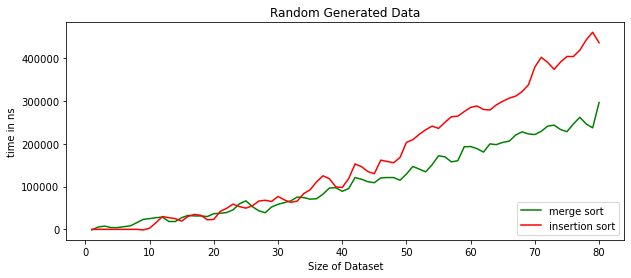

In [5]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

# Plotting the graphs for visualisation
MAX_LENGTH = 80


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4)) # 1 Row of many axes that differ based on array
x = np.arange(1, MAX_LENGTH+1, 1)
# x_smooth = np.linspace(x.min(), x.max(), MAX_THRESH*50)

try:
    matrix = np.load(f"./time_compare/up_to_{MAX_LENGTH}.npy")
    arr_merge = matrix[0]
    arr_insert = matrix[1]

    # Create smooth line chart 
    merge_smooth = savgol_filter(arr_merge, 5, 3)
    insert_smooth = savgol_filter(arr_insert, 5, 3)

    
    # ax.plot(x, arr_merge, color='green', label="merge sort")
    # ax.plot(x, arr_insert, color='red', label="insertion sort")

    ax.plot(x, merge_smooth, color='green', label="merge sort")
    ax.plot(x, insert_smooth, color='red', label="insertion sort")

    # ax[j].plot(x, y_smooth)
    ax.set_title(f"Random Generated Data")    
    ax.set_ylabel("time in ns")
    ax.set_xlabel("Size of Dataset")
    ax.legend(loc="lower right")
    
except Exception as e:
    print(e)

## Conclusion for part a: Seems that S = 32 is the point where insertion sort is slower than merge sort.

# Part B
Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on different input cases and input sizes. You can use the optimal value of S obtained in (a) for this task.

- We assume that the input cases will be the average case (to be generated randomly)
- Input sizes to test: 2^10 (1024) to 2^14(16384)
- For each input size, 10 different datasets will be randomly generated and tested

In [6]:
def compare_cputime_merge_hybrid():

    MIN_POW = 6
    MAX_POW = 11
    STEP = 50
    LENGTHS_TO_TEST = np.arange(2**MIN_POW, 2**MAX_POW, STEP)
    ITERATIONS = 1000

    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"Processing... Start time = {t}.", end="... ")
    matrix_merge = np.zeros([len(LENGTHS_TO_TEST), ITERATIONS])
    matrix_hybrid = np.zeros([len(LENGTHS_TO_TEST), ITERATIONS])

    for index, n in enumerate(LENGTHS_TO_TEST):
        
        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()
            matrix_merge[index][i-1]= time_mergesort(arr=ori_arr) # Store key comparison

        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()
            matrix_hybrid[index][i-1]= time_hybridsort(arr=ori_arr, thresh=32) # Store key comparison

       
    thresh_kc_merge = np.mean(matrix_merge, axis=1)
    thresh_kc_hybrid = np.mean(matrix_hybrid, axis=1)


    # For each n, save the thresh_timings for later plotting.
    np.save(f"./cputime_compare/merge_vs_hybrid_pow_{MIN_POW}_{MAX_POW}.npy", [thresh_kc_merge, thresh_kc_hybrid]) #todo
    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"End time = {t}")

In [7]:
# compare_cputime_merge_hybrid()

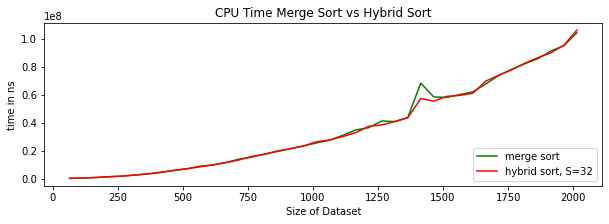

In [8]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

# Plotting the graphs for visualisation
MIN_POW = 6
MAX_POW = 11
STEP = 50
# LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
LENGTHS_TO_TEST = np.arange(2**MIN_POW, 2**MAX_POW, STEP)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,3)) # 1 Row of many axes that differ based on array
x = LENGTHS_TO_TEST
# x_smooth = np.linspace(x.min(), x.max(), MAX_THRESH*50)

try:
    matrix = np.load(f"./cputime_compare/merge_vs_hybrid_pow_{MIN_POW}_{MAX_POW}.npy")
    arr_merge = matrix[0]
    arr_hybrid = matrix[1]

    # Create smooth line chart 
    # y_smooth = savgol_filter(arr, 5, 3)

    # ax[j].plot(x, arr)
    ax.plot(x, arr_merge, color='green', label="merge sort")
    ax.plot(x, arr_hybrid, color='red', label="hybrid sort, S=32")
    # ax[j].plot(x, y_smooth)
    ax.set_title(f"CPU Time Merge Sort vs Hybrid Sort")    
    ax.set_ylabel("time in ns")
    ax.set_xlabel("Size of Dataset")
    ax.legend(loc="lower right")
    
except Exception as e:
    print(e)

## Conclusion for CPU time: It seems that the CPU times are almost identical.

### Now, re-implementing the sorting algorithms to return key comparisons.

In [9]:
# Re-implement to return key comparisons

def hybrid_mergesort(arr: list, start: int, end: int, thresh: int) -> int:
    # Returns total number of key comparisons, kc
    kc1 = kc2 = kc3 = 0
    # IN PLACE SORTING
    if start >= end:
        return 0

    if end-start+1 <= thresh:
        return insertionsort(arr, start, end)

    if end >= start + 2:
        mid = (start+end) // 2
        kc1 = hybrid_mergesort(arr, start, mid, thresh)
        kc2 = hybrid_mergesort(arr, mid+1, end, thresh)

    kc3 = merge(arr, start, end)
    return kc1 + kc2 + kc3

def mergesort(arr: list, start: int, end: int):
    # Returns key comparions, kc
    kc1 = kc2 = kc3 = 0

    # IN PLACE SORTING

    if start >= end:
        return 0

    if end >= start + 2:
        mid = (start+end) // 2
        kc1 = mergesort(arr, start, mid)
        kc2 = mergesort(arr, mid+1, end)

    kc3 = merge(arr, start, end)
    return kc1 + kc2 + kc3

def merge(arr: list, start: int, end: int):
    # Returns key comparisons
    kc = 0
    if start >= end:
        return 0

    mid = start + (end-start) // 2
    start2 = mid + 1

    while start <= mid and start2 <= end:

        # Case 1: if first element is smaller than or equal to right element, i.e correct place
        kc += 1
        if arr[start] <= arr[start2]:
            start += 1

        # Case 2: if first element is larger than right element, then shift the right element to before the left element
        else:
            # Right shift all elements from "start" up till element before "start2"
            value = arr[start2]
            for index in range(start2, start, -1):
                arr[index] = arr[index-1]
            # Copy over original start2 value into original start index
            arr[start] = value

            # Update all pointers for next iteration of while loop
            start += 1
            mid += 1
            start2 += 1
    return kc


def insertionsort(arr: list, start: int, end: int):
    # Returns key comparsions
    kc = 0
    for i in range(start+1, end+1):
        for j in range(i, start, -1):
            kc += 1
            if arr[j] < arr[j-1]:
                swap(arr, j, j-1)
            else:
                break
    return kc

def swap(arr: list, i: int, j: int):
    tmp = arr[j]
    arr[j] = arr[i]
    arr[i] = tmp
    return

In [10]:
def compare_kc():
    
    MIN_POW = 10
    MAX_POW = 14
    STEPS_POW = 1
    LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
    ITERATIONS = 10

    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"Processing size = {MAX_LENGTH}. Start time = {t}.", end="... ")
    matrix_merge = np.zeros([len(LENGTHS_TO_TEST), ITERATIONS])
    matrix_hybrid = np.zeros([len(LENGTHS_TO_TEST), ITERATIONS])

    for index, n in enumerate(LENGTHS_TO_TEST):
        
        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()
            matrix_merge[index][i-1]= mergesort(arr=ori_arr, start=0, end=len(ori_arr)-1) # Store key comparison

        np.random.seed(27)
        for i in range(1, ITERATIONS+1):
            # Generate new array every iteration
            ori_arr = np.random.randint(low=0, high=999, size=n).tolist()
            matrix_hybrid[index][i-1]= hybrid_mergesort(arr=ori_arr, start=0, end=len(ori_arr)-1, thresh=32) # Store key comparison

       
    thresh_kc_merge = np.mean(matrix_merge, axis=1)
    thresh_kc_hybrid = np.mean(matrix_hybrid, axis=1)


    # For each n, save the thresh_timings for later plotting.
    np.save(f"./kc_compare/pow{MIN_POW}_to_pow{MAX_POW}.npy", [thresh_kc_merge, thresh_kc_hybrid]) #todo
    t = time.strftime('%H:%M:%S', time.localtime())
    print(f"End time = {t}")

In [11]:
# compare_kc()

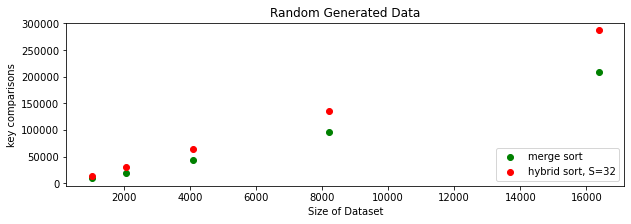

In [12]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

# Plotting the graphs for visualisation
MIN_POW = 10
MAX_POW = 14
STEPS_POW = 1
LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
ITERATIONS = 10


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,3)) # 1 Row of many axes that differ based on array
x = LENGTHS_TO_TEST
# x_smooth = np.linspace(x.min(), x.max(), MAX_THRESH*50)

try:
    matrix = np.load(f"./kc_compare/pow{MIN_POW}_to_pow{MAX_POW}.npy")
    arr_merge = matrix[0]
    arr_hybrid = matrix[1]

    # Create smooth line chart 
    # y_smooth = savgol_filter(arr, 5, 3)

    # ax[j].plot(x, arr)
    ax.scatter(x, arr_merge, color='green', label="merge sort")
    ax.scatter(x, arr_hybrid, color='red', label="hybrid sort, S=32")
    # ax[j].plot(x, y_smooth)
    ax.set_title(f"Random Generated Data")    
    ax.set_ylabel("key comparisons")
    ax.set_xlabel("Size of Dataset")
    ax.legend(loc="lower right")
    
except Exception as e:
    print(e)

### It seems that in terms of key comparisons, using hybrid sort will always result in greater number of key comparisons than using merge sort. This makes sense because when the size of subarray is <= 32, insertion sort is used. Insertion sort always has greater number of key comparisons than merge sort.